## Anonymize Load Test

In [6]:
from pyaaas.models.dataset import Dataset
from pyaaas.aaas import AaaS
from pyaaas.models.attribute_type import AttributeType
from pyaaas.models.privacy_models import KAnonymity
import pandas as pd
from scripts import test_data
import timeit

In [7]:
def test_dataset(row_count):
    raw_data = test_data.test_dataset(row_count)
    df = pd.DataFrame(raw_data)
    df.set_index('id')
    dataset = Dataset.from_pandas(df)
    dataset.set_attribute("id", AttributeType.IDENTIFYING)
    dataset.set_attribute("name", AttributeType.IDENTIFYING)
    dataset.set_hierarchy("gender",test_data.gender_hierarchy())
    dataset.set_hierarchy("location", test_data.location_hierarchy())
    dataset.set_hierarchy("age", test_data.age_hierarchy())
    return dataset

In [8]:
def run_test(dataset):
    risk_profile = con.anonymize(dataset, [KAnonymity(4)])

In [9]:
loc_h = test_data.location_hierarchy()
loc_h

,0,1,2,3
0,Oslo,"{Oslo, Bergen}","{Oslo, Bergen, London, Moscow}",*
1,Bergen,"{Oslo, Bergen}","{Oslo, Bergen, London, Moscow}",*
2,London,"{London, Moscow}","{Oslo, Bergen, London, Moscow}",*
3,Moscow,"{London, Moscow}","{Oslo, Bergen, London, Moscow}",*
4,Bejing,"{Bejing, Tokyo}","{Bejing, Tokyo, Miami}",*
5,Tokyo,"{Bejing, Tokyo}","{Bejing, Tokyo, Miami}",*
6,Miami,{Miami},"{Bejing, Tokyo, Miami}",*


### 1. Run tests

In [10]:
con = AaaS("http://localhost:8080")
batches = (1000, 10000, 100000, 1000000)
result = {}
for batch in batches:
    elapsed_time = timeit.timeit(f"run_test(dataset)",
                                 setup=f"dataset = test_dataset({batch})",
                                 globals=globals(),
                                 number=1)
    result[str(batch)] = elapsed_time
    

In [11]:
result

{'1000': 0.049428618996898877,
 '10000': 0.0842143859990756,
 '100000': 0.6671698829995876,
 '1000000': 7.944885950997559}

In [15]:
result_df = pd.DataFrame.from_dict(result, orient="index", columns=["time"])

In [16]:
result_df

,time
1000,0.049429
10000,0.084214
100000,0.667170
1000000,7.944886


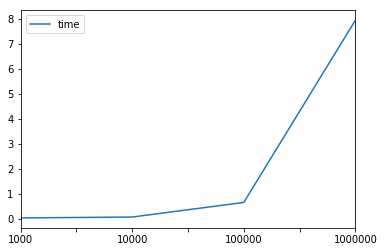

In [18]:
result_df.plot();